In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.std([i for i in range(100)], ddof=1)

29.011491975882016

# Задание взято с [платформы](https://karpov.courses/)
Пришло время первого небольшого проекта по статистике! На этот раз исследуем набор [данных](https://disk.yandex.ru/i/EdjcUYbE9NFhBA) о видеоиграх, объем продаж которых составил более 100 000 копий.

Задания 
1. Первый шаг – загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, размер, наличие пропущенных значений (если есть – удалить). Также изучите типы переменных.
1. Постройте график распределения количества выпущенных игр по годам и выведите описательные характеристики переменной Year.
1. На каких платформах произошло больше всего релизов?
1. Игры каких издателей (Publisher) встречаются в датасете чаще всего?
1. В каком регионе медианное значение объема продаж игр Nintendo является наибольшим? (Регионы: NA, EU, JP, Other)
1. Изучите объемы продаж игр Nintendo в Японии с разбивкой жанрам. Посмотрите на медиану, среднее, межквартильный размах.
1. Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports. В какие моменты времени было продано больше всего игр жанра Sports?

### Описание данных
Имеются следующие поля:

- `Rank` – место по объему продаж
- `Name` – название игры
- `Platform` – платформа, на которой выпущена игра
- `Year` – год релиза
- `Genre` – жанр
- `Publisher` – издатель
- `NA_Sales` – продажи в Северной Америке, в млн.
- `EU_Sales` – продажи в Европе, в млн.
- `JP_Sales` – продажи в Японии, в млн.
- `Other_Sales` – продажи в остальном мире, в млн.
- `Global_Sales` – продажи по всему миру, в млн.

Первый шаг – загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, типы данных, размерность, наличие пропущенных значений.

В каком столбце встретилось больше всего пропущенных значений? В качестве ответа укажите их число, после чего удалите строки с пропущенными значениями из датасета.

In [3]:
games = pd.read_csv('games.csv')

In [4]:
games


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [5]:
games.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [6]:
games.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
games = games.dropna()

Выведите описательные характеристики переменной Year и постройте график распределения количества выпущенных игр по годам.

In [8]:
games.Year.mode()


0    2009.0
dtype: float64

In [9]:
games.Year.mean()

2006.4055613528942

In [10]:
games.Year.median()

2007.0

In [11]:
games.Year.describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

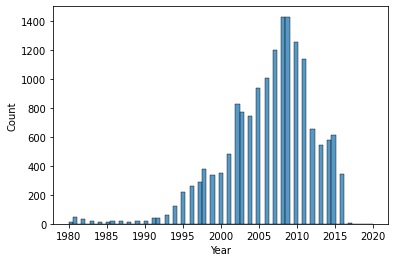

In [12]:
sns.histplot(data=games, x='Year')

На каких платформах произошло больше всего релизов?

In [13]:
games.value_counts('Platform', normalize=True)*100

Platform
DS      13.080842
PS2     13.056289
PS3      8.004420
Wii      7.918483
X360     7.574735
PSP      7.347615
PS       7.298508
PC       5.757780
XB       4.929102
GBA      4.824750
GC       3.326990
3DS      3.063041
PSV      2.516727
PS4      2.062488
N64      1.939721
SNES     1.467068
XOne     1.307470
SAT      1.061936
WiiU     0.877785
2600     0.712050
NES      0.601559
GB       0.595421
DC       0.319195
GEN      0.165736
NG       0.073660
SCD      0.036830
WS       0.036830
3DO      0.018415
TG16     0.012277
PCFX     0.006138
GG       0.006138
dtype: float64

Игры каких издателей (Publisher) встречаются в датасете чаще всего?

In [15]:
games.value_counts('Publisher')

Publisher
Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Elite                              1
Mystique                           1
NDA Productions                    1
Navarre Corp                       1
Locus                              1
Length: 576, dtype: int64

Сфокусируемся на играх от Nintendo. Посчитайте среднее, медиану и стандартное отклонение по продажам игр данного издателя в разных регионах (NA, EU, JP, Other). 

В каком регионе медианное значение объема продаж является наибольшим?

In [22]:
games.query('Publisher == "Nintendo"').describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,696.000000,696.00000,696.000000,696.000000,696.000000,696.000000,696.000000
mean,3801.864943,2003.83046,1.172055,0.601006,0.653721,0.136767,2.563836
std,3969.268372,7.77637,2.989913,1.743953,1.063110,0.464170,5.676925
min,1.000000,1983.00000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,710.750000,2000.00000,0.010000,0.007500,0.090000,0.000000,0.300000
50%,2262.000000,2005.00000,0.375000,0.120000,0.280000,0.030000,0.920000
75%,5901.750000,2009.00000,0.972500,0.482500,0.740000,0.090000,2.262500
max,16545.000000,2016.00000,41.490000,29.020000,10.220000,8.460000,82.740000


In [21]:
games.query('Publisher == "Nintendo"').median()

Rank            2262.000
Year            2005.000
NA_Sales           0.375
EU_Sales           0.120
JP_Sales           0.280
Other_Sales        0.030
Global_Sales       0.920
dtype: float64

Теперь посмотрим на продажи Nintendo в Японии по жанрам. Постройте боксплот, где:

- по оси x будет расположен жанр игры (Genre)
- по оси у – объем продаж в Японии (JP_sales)

Взглянем на получившиеся боксплоты. Что мы можем по ним сказать о данных?

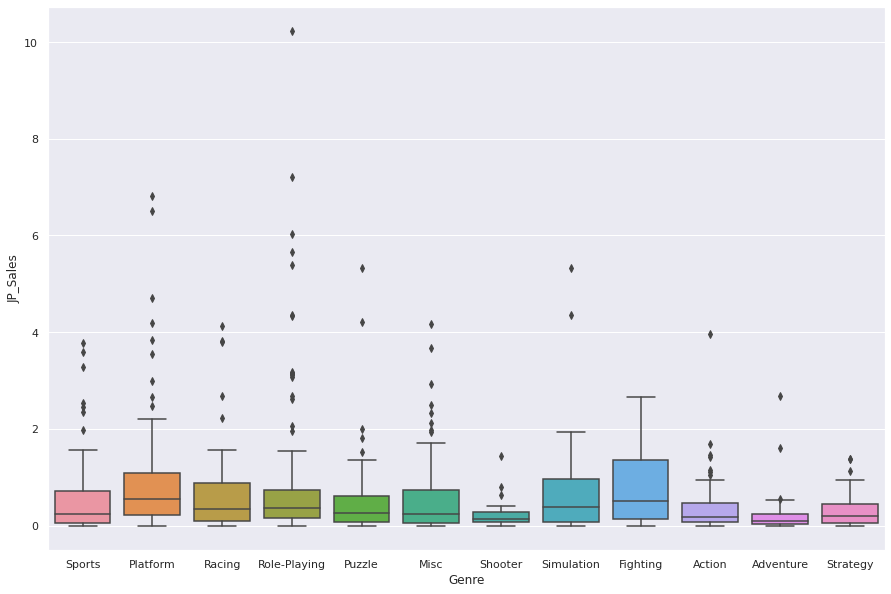

In [29]:
sns.set(rc={'figure.figsize':(15, 10)})
sns.boxplot(data=games.query('Publisher == "Nintendo"'), x='Genre', y='JP_Sales')

Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports.

На каком отрезке времени игры жанра Sports были наиболее популярны? Иными словами, выберите наименьший отрезок, который включает в себя несколько крупных пиков.

In [34]:
df_plot = games.query('Publisher == "Nintendo"')
df_plot = df_plot.query('(Genre == "Fighting")|(Genre == "Simulation")|(Genre == "Platform")|(Genre == "Racing")|(Genre == "Sports")')

df_plot

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
...,...,...,...,...,...,...,...,...,...,...,...
12123,12125,Mario Tennis,Wii,2010.0,Sports,Nintendo,0.00,0.06,0.00,0.01,0.07
12770,12772,Dance Dance Revolution: Mario Mix (JP sales),GC,2005.0,Simulation,Nintendo,0.00,0.00,0.05,0.00,0.06
14626,14629,Calcio Bit,GBA,2006.0,Sports,Nintendo,0.00,0.00,0.03,0.00,0.03
14968,14971,Teddy Together,3DS,2016.0,Simulation,Nintendo,0.00,0.02,0.00,0.00,0.02


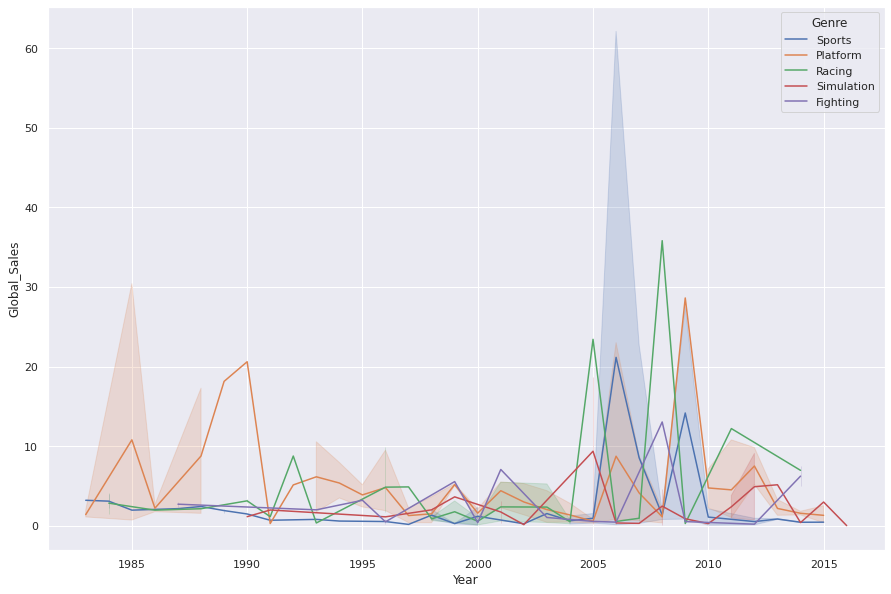

In [41]:
sns.lineplot(data=df_plot, x='Year', y='Global_Sales', hue='Genre')

In [35]:
?? sns.histplot